In [6]:
%pip install --upgrade pip setuptools wheel

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.



     ---------------------------------------- 1.8/1.8 MB 28.2 MB/s eta 0:00:00
  Using cached setuptools-82.0.0-py3-none-any.whl (1.0 MB)
     ---------------------------------------- 74.4/74.4 kB 4.0 MB/s eta 0:00:00


In [7]:
%pip install spacy==3.7.2

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 12.2/12.2 MB 20.0 MB/s  0:00:00
   ---------------------------------------- 2.0/2.0 MB 18.7 MB/s  0:00:00
   ---------------------------------------- 654.7/654.7 kB 12.7 MB/s  0:00:00
   ---------------------------------------- 1.5/1.5 MB 15.6 MB/s  0:00:00
   ---------------------------------------- 6.6/6.6 MB 10.7 MB/s  0:00:00

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [9]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 26.7 MB/s  0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
import spacy
from spacy.matcher import PhraseMatcher
matcher=PhraseMatcher(nlp.vocab)
with open(r"C:\Users\24IT001\Desktop\VAC Files\reaganomics.txt",encoding='cp1252') as f:
    doc3=nlp(f.read())
phrase_list=['voodoo economics','supply-side economics','trickie-down economics','free-market economics']
phrase_patterns=[nlp(text) for text in phrase_list]
matcher.add('VoodooEconomics',None,*phrase_patterns)
matches=matcher(doc3)
matches

ModuleNotFoundError: No module named 'spacy'

In [11]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [12]:
import sys
!C:\ProgramData\Anaconda3\python.exe -m pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import spacy
print(spacy.__version__)

3.7.2


In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\24IT001\Desktop\VAC Files\smsspamcollection.tsv",sep='\t')
print(df.head())

  label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2


In [4]:
len(df)

5572

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
df['label'].describe()

count     5572
unique       2
top        ham
freq      4825
Name: label, dtype: object

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

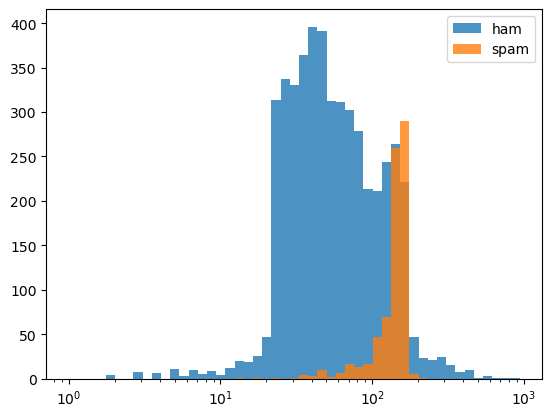

In [10]:
plt.xscale('log')
bins=1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

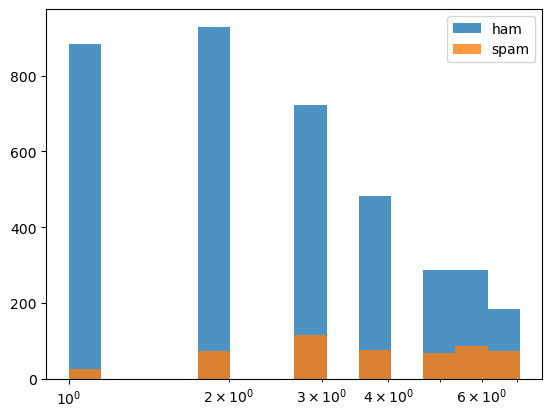

In [11]:
plt.xscale('log')
bins=1.15**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [13]:
X=df[['length','punct']]
y=df['label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
print('Training Data Shape:',X_train.shape)
print('Testing Data Shape:',X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape: (1839, 2)


In [16]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='lbfgs')
lr_model.fit(X_train,y_train)

LogisticRegression()